In [31]:
import pandas as pd

In [32]:
disco = pd.read_csv("ClassicDisco.csv")

In [33]:
disco.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Boogie Oogie Oogie,A Taste Of Honey,A Taste Of Honey,1978,245173,4,0.797,0.548,2,-9.228,0,0.0492,0.0401,0.000010,0.0994,0.868,123.686,53
1,Disco Dancin' - 2004 - Remastered,A Taste Of Honey,A Taste Of Honey,1978,210493,4,0.751,0.570,2,-11.645,1,0.0813,0.3710,0.000020,0.1230,0.770,103.408,11
2,Distant,A Taste Of Honey,A Taste Of Honey,1978,260053,4,0.468,0.512,2,-10.187,1,0.1380,0.7820,0.000020,0.2020,0.714,163.400,13
3,Do It Good,A Taste Of Honey,Another Taste (Expanded Edition),1978,342826,4,0.699,0.740,3,-8.625,0,0.0289,0.0714,0.000002,0.1650,0.889,104.168,17
4,If We Loved,A Taste Of Honey,A Taste Of Honey,1978,266200,4,0.463,0.459,6,-11.600,1,0.0296,0.7640,0.000003,0.1580,0.300,129.267,13


In [34]:
import seaborn as sns

In [35]:
disco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             724 non-null    object 
 1   Artist            724 non-null    object 
 2   Album             724 non-null    object 
 3   Year              724 non-null    int64  
 4   Duration          724 non-null    int64  
 5   Time_Signature    724 non-null    int64  
 6   Danceability      724 non-null    float64
 7   Energy            724 non-null    float64
 8   Key               724 non-null    int64  
 9   Loudness          724 non-null    float64
 10  Mode              724 non-null    int64  
 11  Speechiness       724 non-null    float64
 12  Acousticness      724 non-null    float64
 13  Instrumentalness  724 non-null    float64
 14  Liveness          724 non-null    float64
 15  Valence           724 non-null    float64
 16  Tempo             724 non-null    float64
 1

<Axes: xlabel='Tempo', ylabel='Danceability'>

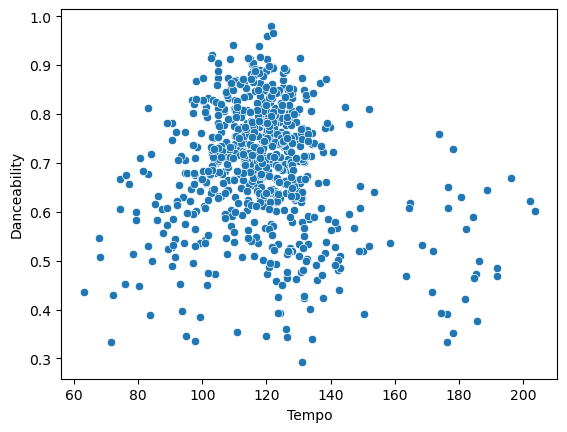

In [36]:
sns.scatterplot(data=disco, x = "Tempo", y = "Danceability")

In [37]:
lesseq120 = disco["Tempo"] <= 120

In [38]:
discoto120 = disco[lesseq120]

<Axes: xlabel='Tempo', ylabel='Danceability'>

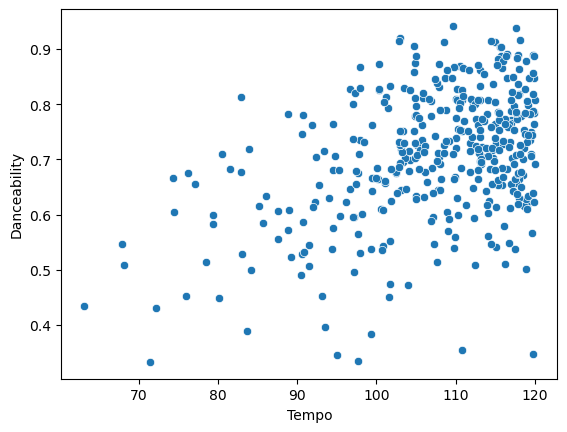

In [39]:
sns.scatterplot(data=discoto120, x = "Tempo", y = "Danceability")

In [40]:
over120 = disco["Tempo"] > 120

In [41]:
discoover120 = disco[over120]

<Axes: xlabel='Tempo', ylabel='Danceability'>

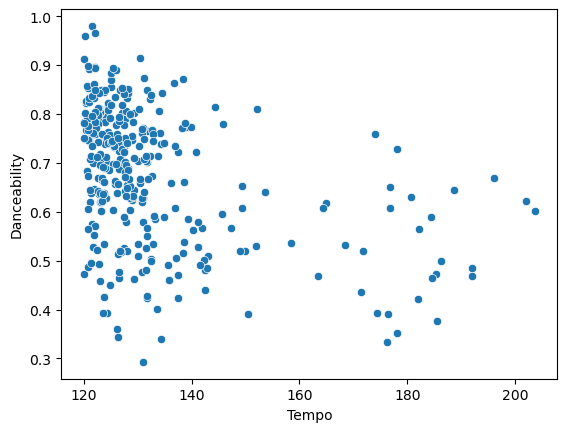

In [42]:
sns.scatterplot(data=discoover120, x = "Tempo", y = "Danceability")

<Axes: xlabel='Tempo', ylabel='Danceability'>

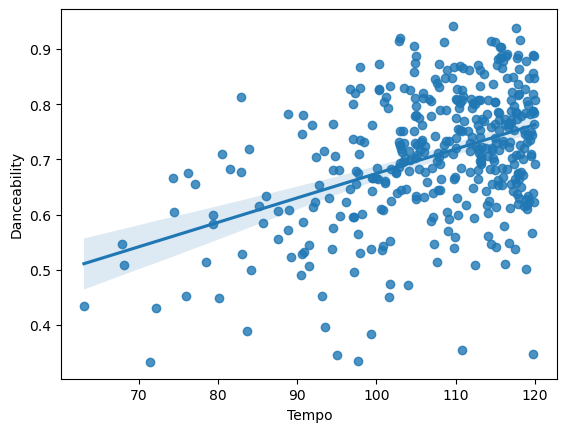

In [43]:
sns.regplot(data=discoto120, x = "Tempo", y = "Danceability")

<Axes: xlabel='Tempo', ylabel='Danceability'>

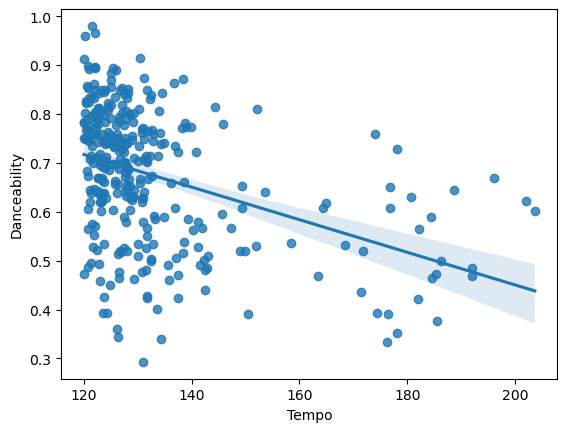

In [44]:
sns.regplot(data=discoover120, x = "Tempo", y = "Danceability")

In [45]:
import scipy.stats

In [46]:
discoto120.to_csv("discoto120.csv")

In [47]:
discoover120.to_csv("discoover120.csv")

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [49]:
modelto120 = sm.OLS.from_formula('Danceability ~ Tempo', data = discoto120)
resultsto120 = modelto120.fit()
print(resultsto120.params)

Intercept    0.231338
Tempo        0.004432
dtype: float64


In [50]:
modelover120 = sm.OLS.from_formula('Danceability ~ Tempo', data = discoover120)
resultsover120 = modelover120.fit()
print(resultsover120.params)

Intercept    1.117139
Tempo       -0.003333
dtype: float64


In [51]:
discoto120final = discoto120[["Tempo", "Danceability"]]

In [52]:
discoover120final = discoover120[["Tempo", "Danceability"]]

In [53]:
discoto120final.corr(method='pearson', numeric_only=True)

,Tempo,Danceability
Tempo,1.000000,0.419847
Danceability,0.419847,1.000000


In [54]:
discoover120final.corr(method='pearson', numeric_only=True)

,Tempo,Danceability
Tempo,1.00000,-0.40181
Danceability,-0.40181,1.00000
